In [10]:
#!pip install atproto
import json
import json
import pandas as pd
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download("vader_lexicon")
from prawcore.exceptions import Forbidden, NotFound, Redirect, RequestException, ResponseException
#!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from atproto import Client


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anastasiiadobson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
client = Client()
client.login(json.load(open("bluesky_creds_2.json"))['login'], json.load(open("bluesky_creds_2.json"))['password'])

ProfileViewDetailed(did='did:plc:hpv5tbxu5fc5wrqnm5bknpjg', handle='anbodo.bsky.social', associated=ProfileAssociated(activity_subscription=ProfileAssociatedActivitySubscription(allow_subscriptions='followers', py_type='app.bsky.actor.defs#profileAssociatedActivitySubscription'), chat=None, feedgens=0, labeler=False, lists=0, starter_packs=0, py_type='app.bsky.actor.defs#profileAssociated'), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:hpv5tbxu5fc5wrqnm5bknpjg/bafkreiek22wqoqsaiyckrnoiorfqpmyintylulqearqyesatmcim456oua@jpeg', banner=None, created_at='2025-08-20T17:31:48.400Z', description=None, display_name='', followers_count=0, follows_count=1, indexed_at='2025-08-20T17:31:48.400Z', joined_via_starter_pack=None, labels=[], pinned_post=None, posts_count=0, status=None, verification=None, viewer=ViewerState(activity_subscription=None, blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=None, muted=False, muted_by_list=None,

In [6]:
def retrieve_posts(params):
    all_posts = []
    while True:
        resp = client.app.bsky.feed.search_posts(params=params)
        posts = resp.posts
        print(f"Retrieved {len(posts)} posts")
        if len(posts) <=1:
            break
        all_posts.extend(posts)
        params['until'] = posts[-1].indexed_at

    #df=posts_df(all_posts)
    all_posts
    return all_posts

In [7]:
def posts_df(posts):
    data = []
    for post in posts:
        data.append({
            "Post URI": post.uri,
            "Content": post.record.text,
            "Author": post.author.handle,
            "Timestamp": post.indexed_at,
            "Likes": post.like_count,
            "Replies": post.reply_count,
            "Reposts": post.repost_count
        })

    # Create DataFrame
    df = pd.DataFrame(data)
    return df

In [21]:
params = {'q': 'smoothies', 'limit': 100,
           'since': '2025-08-01T12:00:00Z', 'until' : '2025-08-20T12:00:00Z'
           }

all_posts = retrieve_posts(params)
df_smoth=posts_df(all_posts)

Retrieved 98 posts
Retrieved 99 posts
Retrieved 100 posts
Retrieved 99 posts
Retrieved 99 posts
Retrieved 100 posts
Retrieved 100 posts
Retrieved 99 posts
Retrieved 83 posts
Retrieved 1 posts


In [22]:
params= {'q': 'longevity', 'limit': 100,
           'since': '2025-08-01T12:00:00Z', 'until' : '2025-08-20T12:00:00Z'
           }

all_posts = retrieve_posts(params)
df_long=posts_df(all_posts)

Retrieved 100 posts
Retrieved 100 posts
Retrieved 100 posts
Retrieved 97 posts
Retrieved 100 posts
Retrieved 98 posts
Retrieved 99 posts
Retrieved 100 posts
Retrieved 99 posts
Retrieved 98 posts
Retrieved 100 posts
Retrieved 99 posts
Retrieved 100 posts
Retrieved 98 posts
Retrieved 99 posts
Retrieved 99 posts
Retrieved 99 posts
Retrieved 100 posts
Retrieved 99 posts
Retrieved 97 posts
Retrieved 100 posts
Retrieved 98 posts
Retrieved 100 posts
Retrieved 97 posts
Retrieved 100 posts
Retrieved 99 posts
Retrieved 48 posts
Retrieved 1 posts


In [26]:
print(df_smoth.columns)

Index(['Post URI', 'Content', 'Author', 'Timestamp', 'Likes', 'Replies',
       'Reposts'],
      dtype='object')


In [32]:
# Add a new column to each DataFrame to track the keyword origin
df_smoth["keyword"] = "smoothie"
df_long["keyword"] = "longevity"

# Combine both DataFrames
df_combined = pd.concat([df_smoth, df_long], ignore_index=True)

# Drop duplicates based on the 'Content' column
df_combined = df_combined.drop_duplicates(subset='Content')

# Save to CSV
df_combined.to_csv("combined_posts.csv", index=False)

In [33]:
print("Total posts mentioning smoothies:", len(df_combined))
print("Posts per post:", df_combined['Content'].value_counts())


Total posts mentioning smoothies: 3377
Posts per post: Content
"Green smoothies, actually.\n\nPepper insisted."                                                                                                                                                                                                                                                                      1
that makes sense. any insight on maintenance or longevity?                                                                                                                                                                                                                                                            1
Few peace movements have demonstrated the longevity or moral clarity of Women in Black. My latest article for @sussexbylines.co.uk \nsussexbylines.co.uk/politics/dem... \n@wilpf.bsky.social \n@jvp.bsky.social \n@pscupdates.bsky.social \n@cnduk.bsky.social \n@bylinesnetwork.co.uk \n@thecanaryuk.bsky.social    1
E

In [15]:
# src/collectors/reddit_collect.py
import os
import re
import json
import time
import yaml
import json
import pandas as pd
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import praw
import numpy as np
import nltk
nltk.download("vader_lexicon")
from prawcore.exceptions import Forbidden, NotFound, Redirect, RequestException, ResponseException
#!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anastasiiadobson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
df = df_combined.copy()
# Ensure VADER is downloaded
nltk.download('vader_lexicon')

# 🔧 Setup sentiment analyzer
sid = SentimentIntensityAnalyzer()

# 🧼 Clean text column
df["Content"] = df["Content"].fillna("")

# 🧠 Apply sentiment analysis
df["sentiment_score"] = df["Content"].apply(lambda x: sid.polarity_scores(str(x))["compound"])
df["sentiment"] = pd.cut(
    df["sentiment_score"],
    bins=[-1, -0.05, 0.05, 1],
    labels=["Negative", "Neutral", "Positive"]
)

# 🗓️ Optional: convert timestamp if needed
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
    df["month"] = df["Timestamp"].dt.to_period("M").astype(str)

# 💾 Save to file
output_path = "processed_bluesky_sentiment.csv"
df.to_csv(output_path, index=False)
print(f"✅ Sentiment-labeled posts saved to: {output_path}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anastasiiadobson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Sentiment-labeled posts saved to: processed_bluesky_sentiment.csv


/var/folders/sf/3_6zfybs6_xcm9ncfcfxk_zr0000gn/T/ipykernel_6786/1712487060.py:25: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["Timestamp"].dt.to_period("M").astype(str)


In [36]:
print(df.columns)

Index(['Post URI', 'Content', 'Author', 'Timestamp', 'Likes', 'Replies',
       'Reposts', 'keyword', 'sentiment_score', 'sentiment', 'month'],
      dtype='object')


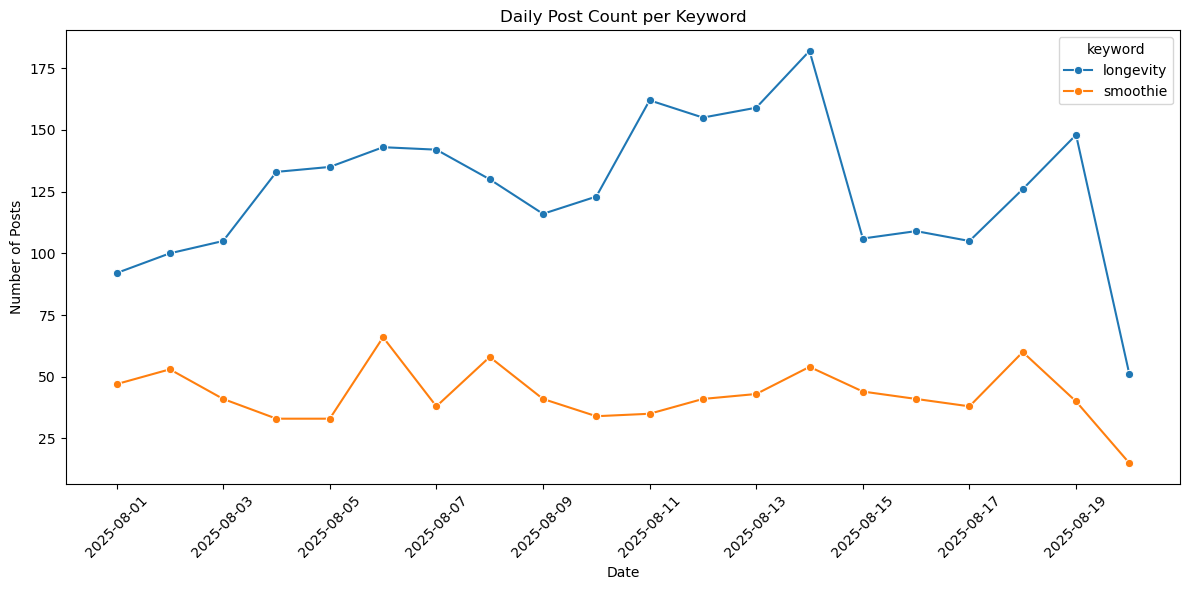

In [42]:
# Make sure 'Timestamp' is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a new 'date' column (day-level granularity)
df['date'] = df['Timestamp'].dt.date

# Group by date and keyword, count posts
daily_counts = df.groupby(['date', 'keyword']).size().reset_index(name='post_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_counts, x='date', y='post_count', hue='keyword', marker='o')

plt.title('Daily Post Count per Keyword')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

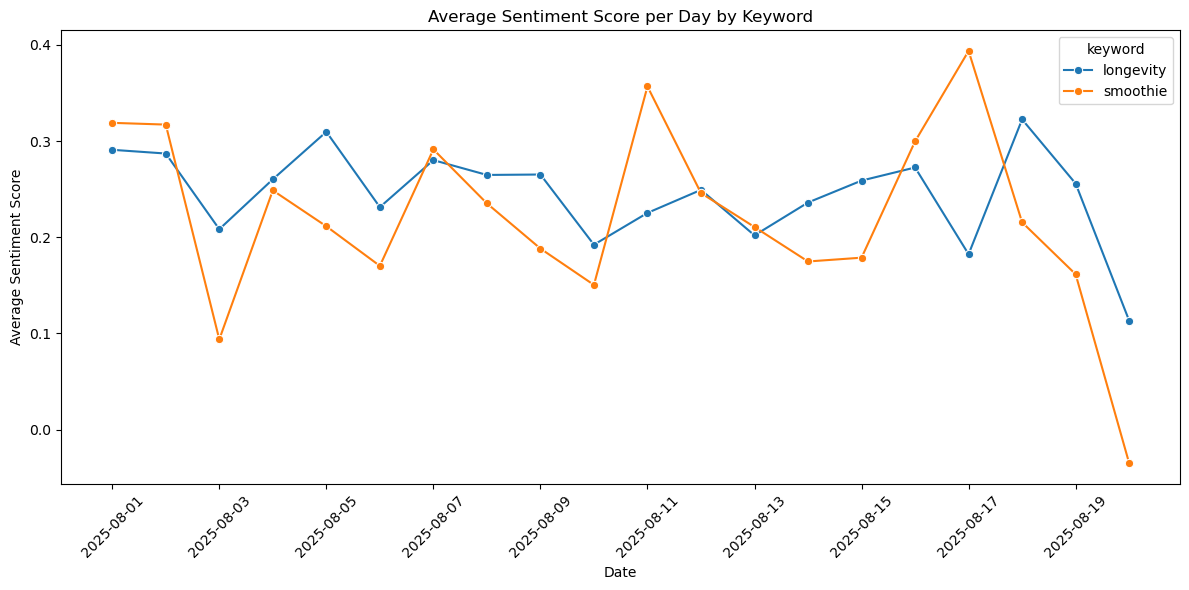

In [44]:
# Ensure Timestamp is datetime and extract date
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = df['Timestamp'].dt.date

# Group by date and keyword, then compute average sentiment
daily_sentiment = (
    df.groupby(['date', 'keyword'])['sentiment_score']
    .mean()
    .reset_index(name='avg_sentiment')
)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, x='date', y='avg_sentiment', hue='keyword', marker='o')

plt.title('Average Sentiment Score per Day by Keyword')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

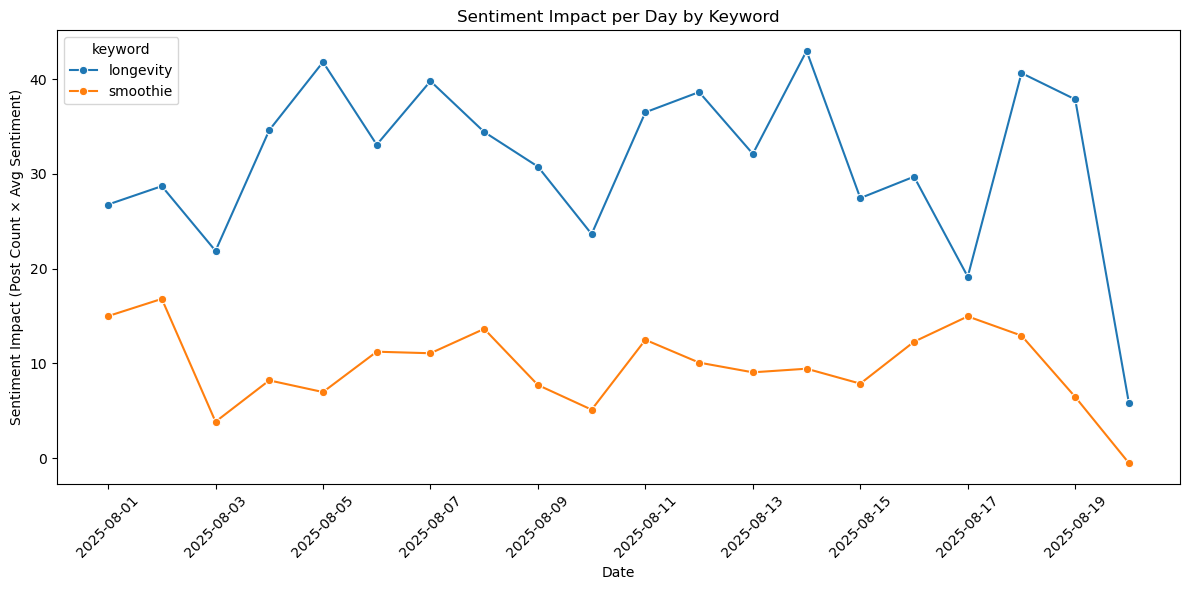

In [45]:
# Count number of posts per day per keyword
daily_counts = (
    df.groupby(['date', 'keyword'])
    .size()
    .reset_index(name='post_count')
)
daily_sentiment = (
    df.groupby(['date', 'keyword'])['sentiment_score']
    .mean()
    .reset_index(name='avg_sentiment')
)
# Merge counts and sentiment
sentiment_impact_df = pd.merge(daily_counts, daily_sentiment, on=['date', 'keyword'])

# Create new column: sentiment impact
sentiment_impact_df['sentiment_impact'] = sentiment_impact_df['post_count'] * sentiment_impact_df['avg_sentiment']
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_impact_df, x='date', y='sentiment_impact', hue='keyword', marker='o')

plt.title('Sentiment Impact per Day by Keyword')
plt.xlabel('Date')
plt.ylabel('Sentiment Impact (Post Count × Avg Sentiment)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()